# Dynamic Programming
### Policy Iteration
Policy Iteration is a Dynamic Programming method to estimate the value function $V_\pi(s)$ of a policy $\pi(a|s)$ and improve the policy so that the actions selected lead to better return.

Here, the Markov Decision Process (MDP) is a simple grid environment where the goal state is 2 rectangles. The states are the x,y positions in the grid and the possible actions are going north, south, west or east.  

The goal is to find the optimal policy so that when placed in a location, an agent can select the best action to find itself in one of the goal states. The policy is initially random (actions are selected with equal probability) and its value function is estimated. For value estimation, the Policy Evaluation algorithm is used. To improve the policy, the Policy Improvement algorithm is used. By itarating Policy Evaluation and Policy Improvement, the policy converges to the optimal one.

In [1]:
%%html
<style>.container {width: 98%}</style>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import sys
sys.path.insert(0, "../../")
from fromscratch.rl.mdp import GridWorld, State
from fromscratch.rl.dp import PolicyEvaluation, PolicyImprovement
from fromscratch.rl.policy import GenericPolicy

### Grid World
Grid environment of n rows and m columns and 2 goal states  
Allowed actions are going north, south, west or east, one step at a time

In [4]:
grid = GridWorld(6, 9, [State([0, 0]), State([4, 6])])

In [5]:
policy = GenericPolicy(grid, gamma=0.9)

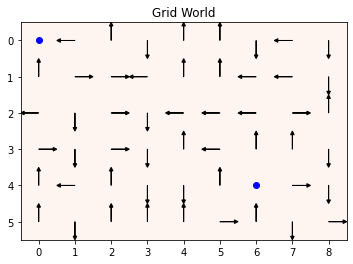

In [6]:
grid.plot(policy)

Initially, the policy chooses actions randomly. The value function of this policy shows which states are better for an agent to be when selecting actions randomly

### Policy Evaluation

In [7]:
evaluator = PolicyEvaluation(grid, policy)

Policy Evaluation iteratively uses the Bellman equation as an update rule to obtain better estimations of the true value function of the policy

$
u_{k+1}(s) = \sum\limits_{a}\pi(a|s) \sum\limits_{s^\prime, r} p(s^\prime, r|s, a)\left[r + \gamma u_{k}(s) \right]
$


In [8]:
for _ in range(20):
    evaluator.evaluate_once()

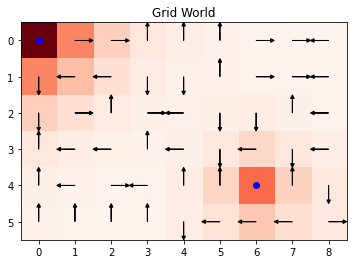

In [9]:
grid.plot(policy)

As expected, the states that are close to the goal have high value and the states far from the goal have all 0 value.  
This basically tells us that when we make random moves, if we are close to the goal we are likely to reach it. But if we are a little farther away, chances are that we will not get to the goal.  

This intuitive result shows that the value function exponentially decreases as we get far away from the goal since there is about $(\frac{1}{4})^n$ probability to reach the goal when we are $n$ steps away from it.

### Policy Iteration
Policy Evaluation and Policy Improvement are executed sequentially to find the optimal policy.  
At every step, the value function estimation is updated and based on it the best action at every state is calculated.

In [10]:
policy.reset()
improver = PolicyImprovement(grid, policy)

In [11]:
for _ in range(10):
    evaluator.evaluate_once()
    improver.improve_once()

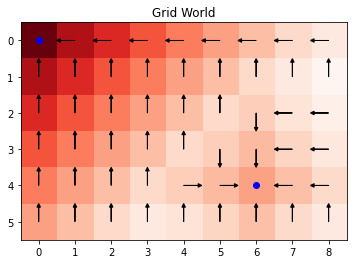

In [12]:
grid.plot(policy)

We see that the value function of the new policy is much more informative than the one of the random policy. Even for states far from the goal there it is a clear which direction to follow (basically doing gradient descent on the value function). Also, the policy has been optimized to point to states with higher value function.

### Windy Grid World
A variation of the Grid World environment adds a "wind" in the state space such that every action is affected by an additional vertical move

In [13]:
windy_grid = GridWorld(7, 10, goal=[State([3, 7])], wind=np.array([0, 0, 0, -1, -1, -1, -2, -2, -1, 0]))

In [14]:
policy = GenericPolicy(windy_grid, gamma=0.9)

evaluator = PolicyEvaluation(windy_grid, policy)
improver = PolicyImprovement(windy_grid, policy)

In [15]:
for _ in range(30):
    evaluator.evaluate_once()
    improver.improve_once()

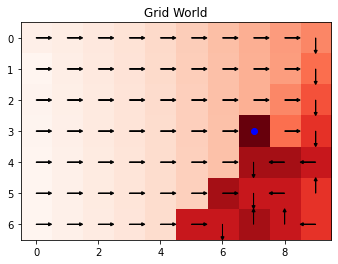

In [16]:
windy_grid.plot(policy)

The most interesting observation is that the improved policy learned that in order to get to the goal, it shouldn't follow the most direct path to it. But instead "follow the wind" and transition to states that while are farer from the goal, the influence of the wind will take the agent to the it.   

An example is the state just to the right of the goal. The optimal action is going to the opposite direction and sort of circle around the goal and go to the state under it. In this state the optimal action is again going opposite (downwards). But due to the wind the agent will then be placed directly on the goal state.